In [11]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time
from simulate import simulate
import multiprocessing as mp
from decimal import *

### Define jobs to run

In [12]:
infection_rate = (0.0,1.0,4)
tile_rate = (0.0,1.0,4)
inf_rate_size = infection_rate[2]
tile_rate_size = tile_rate[2]
inf = np.linspace(infection_rate[0], infection_rate[1], infection_rate[2])
tile_inf = np.linspace(tile_rate[0], tile_rate[1], tile_rate[2])

In [13]:
Lx = 30
Ly = 30
stepSize = 0.5
N = 100
N_ill = 1
flow = 0
realisations = 10
tMax = 1000

In [14]:
per = np.zeros(shape=(inf_rate_size, tile_rate_size), dtype=float)
env = np.zeros(shape=(inf_rate_size, tile_rate_size), dtype=float)

In [15]:
total_jobs = inf_rate_size * tile_rate_size
last_inf = infection_rate[0]
last_tile = tile_rate[0]
last_row = 0
last_col = 0
print(total_jobs)

16


In [16]:
# %%time
if __name__ ==  '__main__': 
    for t in range(total_jobs):
        curr_row = int(t/(tile_rate_size))
        curr_col = t-int(t/(tile_rate_size))*(tile_rate_size)
        job = tuple([N, N_ill, Lx, Ly, stepSize, inf[curr_row], tile_inf[curr_col], tile_inf[curr_col], flow, tMax])
        works = [job for i in range(realisations)]
        with mp.Pool(mp.cpu_count()) as pool:
            p_r = pool.map_async(simulate, works)
            res = p_r.get()
        for i in range(len(res)):
            res[i] = (res[i]['from_per'].cumsum(), res[i]['from_env'].cumsum())
        ts = np.mean(res, axis=0)
        from_per = ts[0][-1]/job[0]
        from_env = ts[1][-1]/job[0]
        per[curr_row][curr_col] = from_per
        env[curr_row][curr_col] = from_env

In [10]:
np.save('from_per', per)
np.save('from_env', env)

### Plot results

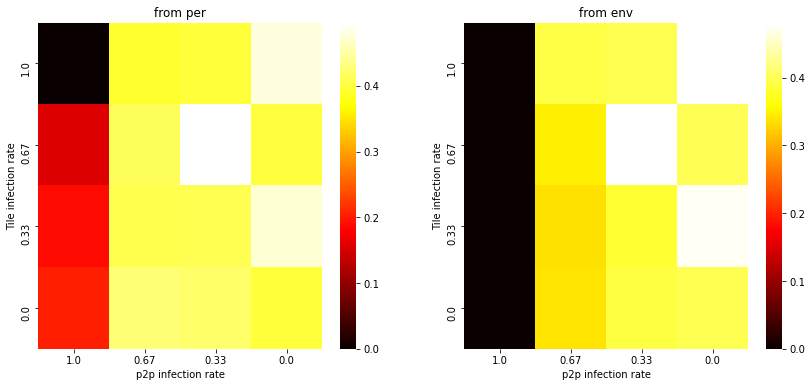

In [18]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
sns.heatmap(per+env, xticklabels=np.flip(np.around(inf, decimals=2)), yticklabels=np.flip(np.around(tile_inf, decimals=2)), cmap='hot',ax=ax[0])
sns.heatmap(env, xticklabels=np.flip(np.around(inf, decimals=2)), yticklabels=np.flip(np.around(tile_inf, decimals=2)), cmap='hot',ax=ax[1])
ax[0].set_xlabel("p2p infection rate")
ax[0].set_ylabel("Tile infection rate")
ax[0].set_title("from per")
ax[1].set_xlabel("p2p infection rate")
ax[1].set_ylabel("Tile infection rate")
ax[1].set_title("from env")
plt.show()